# Set up

Load Libraries

In [105]:
import pandas as pd ##for data import
import numpy as np
import random
import seaborn as sns ##for plotting
import matplotlib.pyplot as plt ##for plotting
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load Dataset

Banknote_auth = pd.read_csv('data_banknote_authentication.txt', header=None)
Banknote_auth.head()
Banknote_auth.info()

Rename Column Headers 

In [3]:
Banknote_auth.rename(columns={0: 'variance', 1: 'skewness', 2: 'kurtosis', 3: 'entropy', 4: 'class'}, inplace=True)

In [4]:
#Explore the dataset
Banknote_auth.shape

(1372, 5)

In [6]:
Banknote_auth.tail()

,variance,skewness,kurtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


Exploratory Data Analysis

In [7]:
Banknote_auth.describe(include='all')

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Count number of missing observations if any

In [8]:
Banknote_auth.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [9]:
Banknote_auth['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

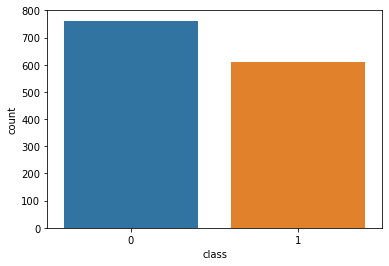

In [37]:
sns.countplot(x=Banknote_auth['class'])
plt.show()

 Distribution of the numeric variables

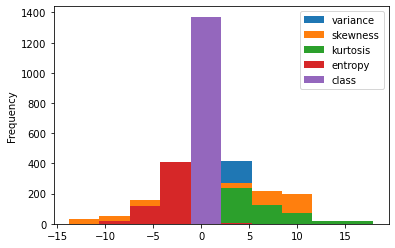

In [38]:
Banknote_auth.plot(kind='hist')
plt.show()

In [39]:
variables = [
    'variance', 'skewness', 'kurtosis', 'entropy',
]

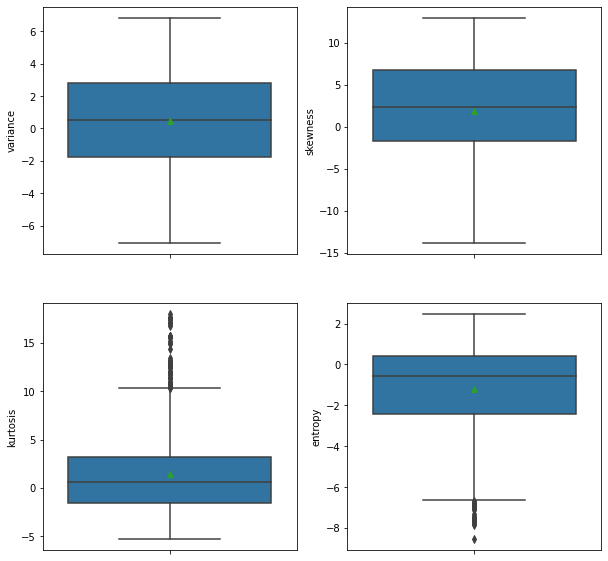

In [173]:
plt.figure(figsize=(10, 10))
for plot in range(len(variables)):
    plt.subplot(2, 2, plot+1)
    sns.boxplot(y=Banknote_auth[variables[plot]], showmeans=True)
plt.show()

 Determining the class feature and input feature

In [14]:
x = Banknote_auth.iloc[:, [0,1,2,3]].values
y = Banknote_auth.iloc[:, [4]].values

Splitting the dataset into Test set and Training set

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Standardizing the train and test dataset

In [16]:
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

Training the Model

In [17]:
# Fitting Decision Tree Classification to the Training Set

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# Predicting the test set results
y_pred=classifier.predict(x_test_s)
print(y_pred)

[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 1 0]


In [42]:
print(y_test.ravel())

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0]


In [20]:
# Evaluating the performance of the model - Accuracy score

accuracy_score(y_test, y_pred)

0.8009708737864077

In [21]:
matrix=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(matrix,'\n\n')
print('---------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

Confusion Matrix:
[[150  82]
 [  0 180]] 


---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       232
           1       0.69      1.00      0.81       180

    accuracy                           0.80       412
   macro avg       0.84      0.82      0.80       412
weighted avg       0.86      0.80      0.80       412



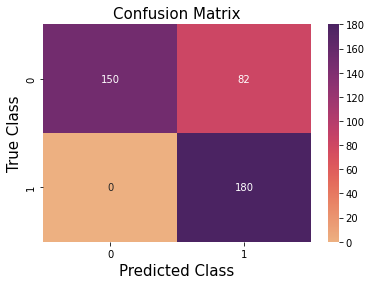

In [22]:
#Visualizing the Confusion Matrix

Visual = sns.heatmap(matrix, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)

plt.show()

# Neural Network

## Import Tensorflow

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers

In [24]:
x_train_s.shape[1]

4

In [64]:
#Set seed for reproducible results
def set_seed(seed=50):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

In [158]:
set_seed()
model = keras.Sequential([
    keras.Input(shape = (x_train_s.shape[1],), name='Input_layer'),
    layers.Dense(units=100, activation='relu', name='Hidden_layer'),
    layers.Dropout(rate=0.6),
    layers.Dense(units=1, activation='sigmoid') 
], name ='first_model')

In [159]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer (Dense)        (None, 100)               500       
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [160]:
#Compile the model
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [161]:
#Train the model using the fit method
history=model.fit(x_train, y_train,
                 batch_size=32, 
                 epochs=10,
                 verbose=1,
                 validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 1s 11ms/step - loss: 0.7478 - accuracy: 0.5872 - val_loss: 0.4281 - val_accuracy: 0.7917
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7604 - val_loss: 0.3165 - val_accuracy: 0.8750
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3637 - accuracy: 0.8477 - val_loss: 0.2512 - val_accuracy: 0.9167
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8919 - val_loss: 0.2106 - val_accuracy: 0.9427
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9440 - val_loss: 0.1807 - val_accuracy: 0.9479
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.9323 - val_loss: 0.1579 - val_accuracy: 0.9479
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9388 - val_loss: 0.1404 - val_accuracy: 0.9531
Epoch 8/10
24/24 [=

In [162]:
#Evaluating the Neural Network

model.evaluate(x_test_s, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8714


[0.3939060866832733, 0.8713592290878296]

In [163]:
#model.predict(x_test_s)

In [164]:
ypred_nn=np.round(model.predict(x_test_s))

13/13 [==============================] - 0s 1ms/step


In [165]:
ypred_nn=ypred_nn.astype(int)

In [166]:
ypred_nn.ravel()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

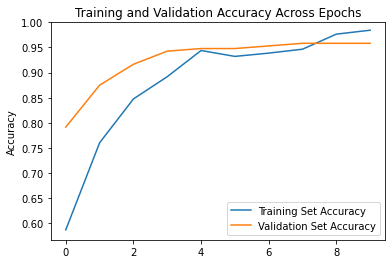

In [167]:
#Plotting the training and validation accuracy

accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

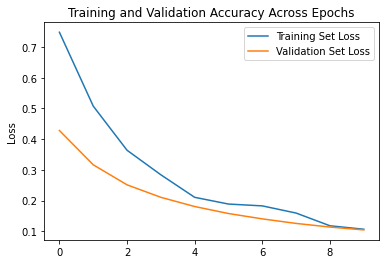

In [168]:
#Plotting the training and validation loss

loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [169]:
print(classification_report(y_test, ypred_nn))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       232
           1       0.77      1.00      0.87       180

    accuracy                           0.87       412
   macro avg       0.89      0.89      0.87       412
weighted avg       0.90      0.87      0.87       412



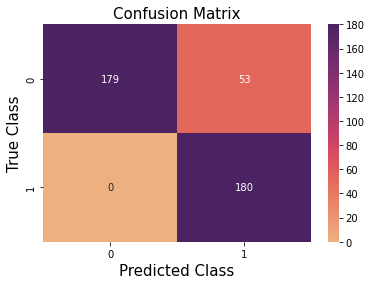

In [170]:
ConfusionMatrix = confusion_matrix(y_test,ypred_nn)
ax = sns.heatmap(ConfusionMatrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)
plt.show()